In [495]:
# Dependencies
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [496]:
# Import our data into pandas from CSV
avgIncome_string = 'Average Income by State.csv'
cols = [0,5,7,9,11,13,15,17,19,21,23,25]
#skip_rows = [1,2,3,4,5]
avgIncome_df = pd.read_csv(avgIncome_string, usecols=cols)#, skipfooter= 54, engine='python')
avgIncome_df.head(10)

,State,2014,2013 (39),2013 (38),2012,2011,2010 (37),2009 (36),2008,2007,2006,2005
0,NaN,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome,Median\nincome
1,United States,53657,53585,51939,51017,50054,49276,49777,50303,50233,48201,46326
2,Alabama,42278,47320,41381,43464,42590,40933,39980,44476,42212,37952,37150
3,Alaska,67629,72472,61137,63648,57431,57848,61604,63989,62993,56418,55891
4,Arizona,49254,52611,50602,47044,48621,46896,45739,46914,47215,46657,45245
5,Arkansas,44922,39376,39919,39018,41302,38587,36538,39586,40795,37057,36658
6,California,60487,60794,57528,57020,53367,54283,56134,57014,55734,55319,51755
7,Colorado,60940,67912,63371,57255,58629,60233,55930,60943,61141,55697,50449
8,Connecticut,70161,69291,67781,64247,65415,65998,64851,64682,64141,62404,56835
9,Delaware,57522,54091,52219,48972,54660,55214,52114,50702,54589,52438,51235


In [497]:
new_df = avgIncome_df[["State","2005","2006", "2007","2008", "2009 (36)","2010 (37)","2011", "2012", "2013 (39)", "2014"]]
new_df
avgIncome_new_df = new_df.rename(columns={"2009 (36)": "2009", "2010 (37)": "2010", "2013 (39)":"2013"})
avgIncome_new_df
avgIncome_new_df = avgIncome_new_df.dropna(how="any")
avgIncome_new_df.head()

,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,United States,46326,48201,50233,50303,49777,49276,50054,51017,53585,53657
2,Alabama,37150,37952,42212,44476,39980,40933,42590,43464,47320,42278
3,Alaska,55891,56418,62993,63989,61604,57848,57431,63648,72472,67629
4,Arizona,45245,46657,47215,46914,45739,46896,48621,47044,52611,49254
5,Arkansas,36658,37057,40795,39586,36538,38587,41302,39018,39376,44922


In [498]:
# Import our data into pandas from CSV
#This is the personal healthcare cost in Thousands:
healthcareCost_string = 'US Per Capital Healthcare Costs by State.csv'
cols = [5, 20,21,22,23,24,25,26,27,28,29]
skip_rows = [1,2,3,4,5,6,7,8,9]
healthcareCost_df = pd.read_csv(healthcareCost_string, usecols=cols,skiprows=skip_rows, skipfooter= 540, engine='python')
healthcareCost_df.head()
healthcareCost_df = healthcareCost_df.rename(columns={"Y2005": "2005", "Y2006": "2006", "Y2007":"2007", "Y2008":"2008",
                                                     "Y2009":"2009", "Y2010":"2010", "Y2011":"2011", "Y2012":"2012",
                                                     "Y2013":"2013","Y2014":"2014"})
healthcareCost_df.head()

,State_Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Alabama,5545,5755,5928,6097,6325,6421,6541,6821,6996,7281
1,Alaska,7145,7476,7975,8447,8745,9129,9586,10130,10428,11064
2,Arizona,4828,5103,5410,5660,5874,6027,6076,6183,6262,6452
3,Arkansas,5254,5469,5766,6000,6238,6412,6585,6804,6929,7408
4,California,5107,5397,5776,6038,6210,6480,6737,7018,7256,7549


In [499]:
#Plotting

#x = healthcareCost_df['State_Name']
x = np.arange(len(healthcareCost_df))
tick_locations = [value+0.4 for value in x]
plt.figure(figsize=(20,5))
plt.bar(x, healthcareCost_df["2007"], color='blue', alpha=0.5, align="edge")
# plt.bar(x, healthcareCost_df["2010"], color='blue', alpha=0.5, align="edge")
# plt.bar(x, healthcareCost_df["2014"], color='gold', alpha=0.5, align="edge")


plt.xticks(tick_locations, healthcareCost_df["State_Name"], rotation="vertical")

([<matplotlib.axis.XTick at 0x114def518>,
 <a list of 51 Text xticklabel objects>)

In [500]:
# Set a Title and labels
plt.title("Healthcare cost per state in 2007")
plt.xlabel("State")
plt.ylabel("Cost")

Text(0,0.5,'Cost')

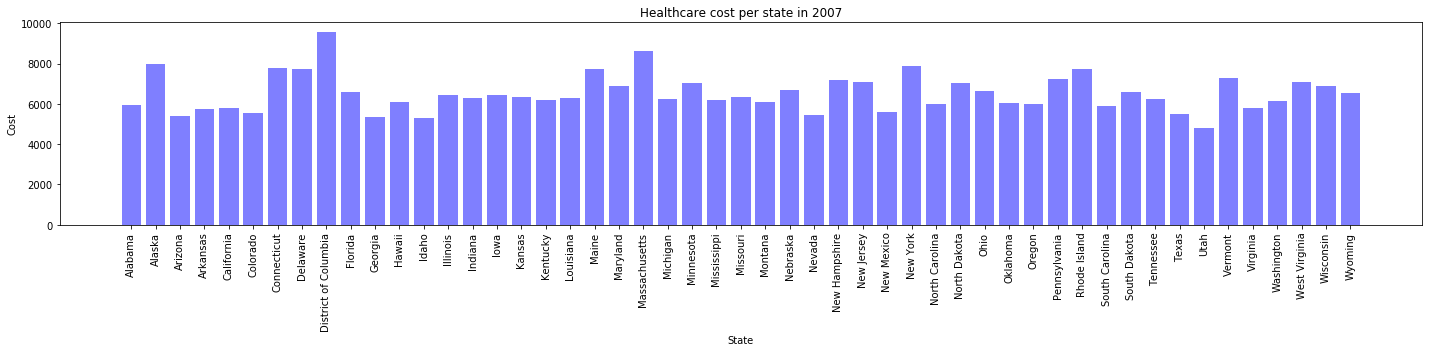

In [501]:
# Save our graph and show the graph
plt.tight_layout()
plt.show()

In [502]:
# Filter the DataFrame down only to those columns to chart
stateWithFewYears = healthcareCost_df[["State_Name","2005","2010", "2014"]]
#print(stateWithFewYears)
# Set the index to be "State" so they will be used as labels
stateWithFewYears_df = stateWithFewYears.set_index("State_Name")

stateWithFewYears_df.head()

,2005,2010,2014
State_Name,,,
Alabama,5545,6421,7281
Alaska,7145,9129,11064
Arizona,4828,6027,6452
Arkansas,5254,6412,7408
California,5107,6480,7549


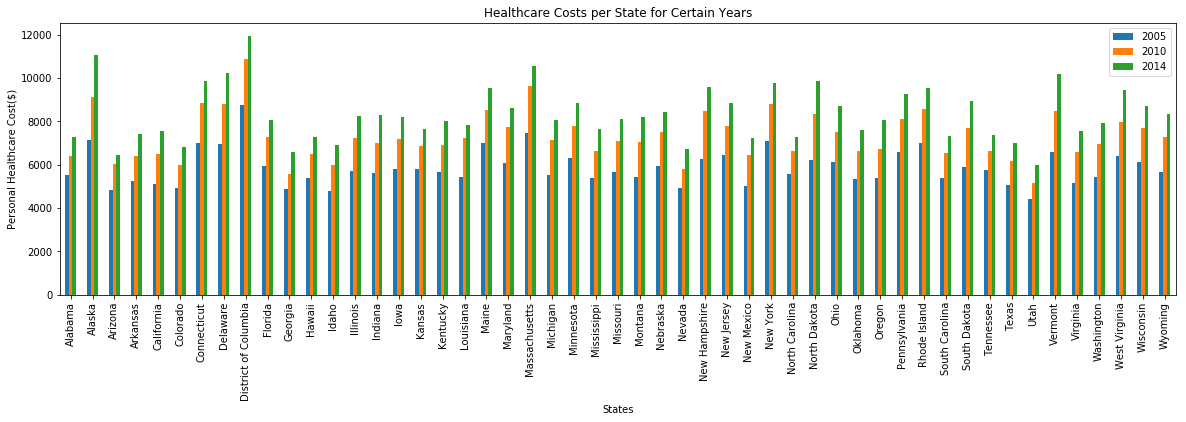

In [503]:
# Use DataFrame.plot() in order to create a bar chart of the data
stateWithFewYears_df.plot(kind="bar", figsize=(20,5))
plt.legend(loc="best")
# Set a title for the chart
plt.title("Healthcare Costs per State for Certain Years")
plt.xlabel("States")
plt.ylabel("Personal Healthcare Cost($)")
plt.show()

In [504]:
# new_df = healthcareCost_df.groupby('Y2005')
# new_df.head()

switch_cols_rows_df = healthcareCost_df.set_index('State_Name').T
switch_cols_rows_df.head()


State_Name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2005,5545,7145,4828,5254,5107,4937,6997,6980,8764,5957,...,5885,5773,5060,4399,6568,5167,5450,6396,6144,5683
2006,5755,7476,5103,5469,5397,5264,7391,7315,9003,6284,...,6257,5950,5276,4581,6934,5462,5729,6706,6539,6145
2007,5928,7975,5410,5766,5776,5522,7793,7726,9562,6585,...,6579,6219,5495,4799,7295,5776,6128,7086,6867,6545
2008,6097,8447,5660,6000,6038,5685,8219,8136,9959,6854,...,6953,6305,5758,4990,7623,6104,6487,7326,7169,6811
2009,6325,8745,5874,6238,6210,5882,8740,8405,10439,7134,...,7335,6499,6004,5101,8111,6452,6838,7772,7512,6972


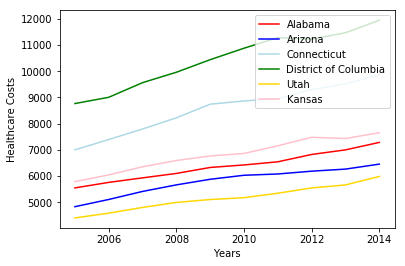

In [505]:
#Plotting 

x = [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014]
#y = np.arange(4000,12000,1000)
#x = switch_cols_rows_df['State_Name']
Alabama = switch_cols_rows_df["Alabama"]
Arizona = switch_cols_rows_df["Arizona"]
Connecticut = switch_cols_rows_df["Connecticut"]
District_of_Columbia = switch_cols_rows_df["District of Columbia"]
Utah = switch_cols_rows_df["Utah"]
Kansas = switch_cols_rows_df["Kansas"]

plt.xlabel("Years")
plt.ylabel("Healthcare Costs")
plt.plot(x, Alabama, 'red')
plt.plot(x, Arizona, 'blue')
plt.plot(x, Connecticut, 'lightblue')
plt.plot(x, District_of_Columbia, 'green')
plt.plot(x, Utah, 'gold')
plt.plot(x, Kansas, 'pink')

plt.legend(loc=1)

plt.show()

In [506]:
#Switch the rows and columns for average salary
switch_salary_df = avgIncome_new_df.set_index('State').T
switch_salary_df


State,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,D.C.,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2005,46326,37150,55891,45245,36658,51755,50449,56835,51235,44993,...,43151,39406,41422,54813,50704,51914,50646,36445,44650,44718
2006,48201,37952,56418,46657,37057,55319,55697,62404,52438,48477,...,45427,40693,43307,54628,51981,57119,54723,38419,51692,47041
2007,50233,42212,62993,47215,40795,55734,61141,64141,54589,50783,...,46418,41195,46053,53529,47390,59161,58080,42091,51277,48744
2008,50303,44476,63989,46914,39586,57014,60943,64682,50702,55590,...,51600,39702,46490,62537,50706,61985,56631,37994,51200,53337
2009,49777,39980,61604,45739,36538,56134,55930,64851,52114,53141,...,45826,40517,47475,58491,52318,60501,60392,40490,51237,52470
2010,49276,40933,57848,46896,38587,54283,60233,65998,55214,56928,...,45352,38591,47266,56701,55928,60367,56163,42777,50351,52201
2011,50054,42590,57431,48621,41302,53367,58629,65415,54660,55251,...,47223,42279,49047,55493,51862,62616,56850,41821,52058,54509
2012,51017,43464,63648,47044,39018,57020,57255,64247,48972,65246,...,49415,42995,51926,58341,55582,64632,62187,43553,53079,57512
2013,53585,47320,72472,52611,39376,60794,67912,69291,54091,60057,...,53413,43361,51406,61047,65513,65907,63922,43069,51726,67441
2014,53657,42278,67629,49254,44922,60487,60940,70161,57522,68277,...,53053,43716,53875,63383,60708,66155,59068,39552,58080,55690


2005    5545
2006    5755
2007    5928
2008    6097
2009    6325
2010    6421
2011    6541
2012    6821
2013    6996
2014    7281
Name: Alabama, dtype: int64
2005    37150
2006    37952
2007    42212
2008    44476
2009    39980
2010    40933
2011    42590
2012    43464
2013    47320
2014    42278
Name: Alabama, dtype: object


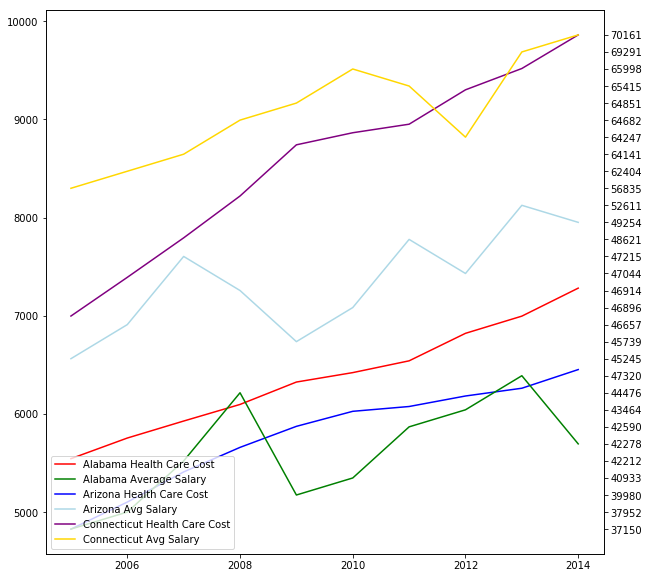

In [507]:
x = np.array([2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])

Alabama = switch_cols_rows_df["Alabama"]
Arizona = switch_cols_rows_df["Arizona"]
Connecticut = switch_cols_rows_df["Connecticut"]
District_of_Columbia = switch_cols_rows_df["District of Columbia"]
Utah = switch_cols_rows_df["Utah"]
Kansas = switch_cols_rows_df["Kansas"]

fig, ax1 = plt.subplots(figsize=(10, 10))
print(Alabama)
HealthCarecost, = ax1.plot(x, Alabama, 'r-', label="Alabama Health Care Cost")
a, = ax1.plot(x, Arizona, 'blue', label="Arizona Health Care Cost")
c, = ax1.plot(x, Connecticut, 'purple', label="Connecticut Health Care Cost")
# ax1.plot(x, District_of_Columbia, 'green')
# ax1.plot(x, Utah, 'gold')
#ax1.plot(x, Kansas, 'pink')

ax2 = ax1.twinx()

x2 = np.array([10000, 20000, 30000,40000,50000,60000,70000,80000,90000, 100000 ])
#x2 = np.arange(0, 100000, 10000)

Alabama_ax2 = switch_salary_df["Alabama"]
Arizona_ax2 = switch_salary_df["Arizona"]
Connecticut_ax2 = switch_salary_df["Connecticut"]
District_of_Columbia_ax2 = switch_salary_df["D.C."]
Utah_ax2 = switch_salary_df["Utah"]
Kansas_ax2 = switch_salary_df["Kansas"]

print(Alabama_ax2)
#print(x2)
AverageSalary, = ax2.plot(x, Alabama_ax2, 'g-', label="Alabama Average Salary")
b, = ax2.plot(x, Arizona_ax2, 'lightblue', label="Arizona Avg Salary")
d, = ax2.plot(x, Connecticut_ax2, 'gold', label="Connecticut Avg Salary")
# ax2.plot(x, District_of_Columbia_ax2, 'green')
# ax2.plot(x, Utah_ax2, 'gold')
#ax2.plot(x2, Kansas_ax2, 'pink')
#plt.figure(figsize=(10,10))
#fig.tight_layout()
plt.legend(handles=[HealthCarecost, AverageSalary, a, b, c, d], loc=3)

plt.show()

In [508]:
salary = []

for item in Alabama_ax2:
    salary.append(item)
print(salary)

percent_salary_cost = {}

# for x in Alabama:
#     for y in salary:
#         percent_salary_cost.update({'item3': 3})


# plot(kind='pie', figsize=(9,9))
# plt.show()

['37150', '37952', '42212', '44476', '39980', '40933', '42590', '43464', '47320', '42278']


In [509]:
alabama_salary = (switch_salary_df["Alabama"])
print(alabama_salary)

2005    37150
2006    37952
2007    42212
2008    44476
2009    39980
2010    40933
2011    42590
2012    43464
2013    47320
2014    42278
Name: Alabama, dtype: object


41835.5
6371.0


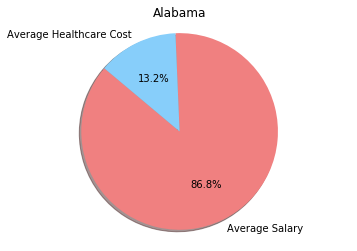

64301.3
7660.2


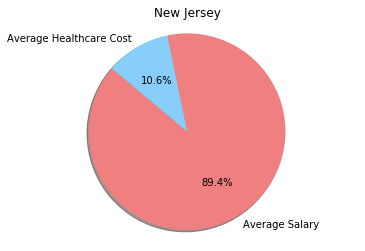

In [512]:
# Alabama:
#alabama_salary = float(switch_salary_df["Alabama"][0].replace(',',''))
alabama_salary = (switch_salary_df["Alabama"]).astype(float).mean()
print(alabama_salary)
alabama_cost = switch_cols_rows_df["Alabama"].mean()
print(alabama_cost)

labels = 'Average Salary', 'Average Healthcare Cost'
sizes = [alabama_salary, alabama_cost]
colors = ['lightCoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Alabama")
 
plt.axis('equal')
plt.show()

# New Jersey:
NJ_salary = (switch_salary_df["New Jersey"]).astype(float).mean()
print(NJ_salary)
NJ_cost = switch_cols_rows_df["New Jersey"].mean()
print(NJ_cost)

labels = 'Average Salary', 'Average Healthcare Cost'
sizes = [NJ_salary, NJ_cost]
colors = ['lightCoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("New Jersey")
 
plt.axis('equal')
plt.show()

64301.3
7660.2


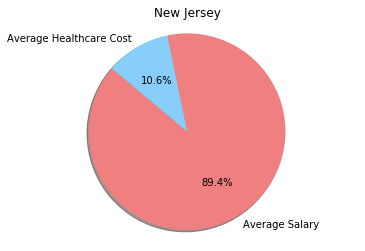

In [511]:
# New Jersey:
NJ_salary = (switch_salary_df["New Jersey"]).astype(float).mean()
print(NJ_salary)
NJ_cost = switch_cols_rows_df["New Jersey"].mean()
print(NJ_cost)

labels = 'Average Salary', 'Average Healthcare Cost'
sizes = [NJ_salary, NJ_cost]
colors = ['lightCoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("New Jersey")
 
plt.axis('equal')
plt.show()